# RNN

In [1]:
import numpy as np
from autograd import grad
import autograd.numpy as np1
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import random
import time
from scipy.optimize import BFGS,SR1
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint

[[0.62819429]
 [0.34884328]
 [0.28962183]
 [0.07387326]]
[[-0.57180571]
 [ 0.01007927]
 [-0.31037817]
 [ 0.07387326]]
-2.2813289652224356
[[0.28647507]
 [0.60883785]
 [0.20748552]
 [0.95363258]]
[[-0.54685826]
 [ 0.2019111 ]
 [-0.20918115]
 [ 0.95363258]]
-2.2050539395776823
[[0.40344415]
 [0.19786558]
 [0.62078771]
 [0.3393722 ]]
[[-0.76322252]
 [ 0.01969518]
 [ 0.03745438]
 [ 0.3393722 ]]
-2.1407619352395018


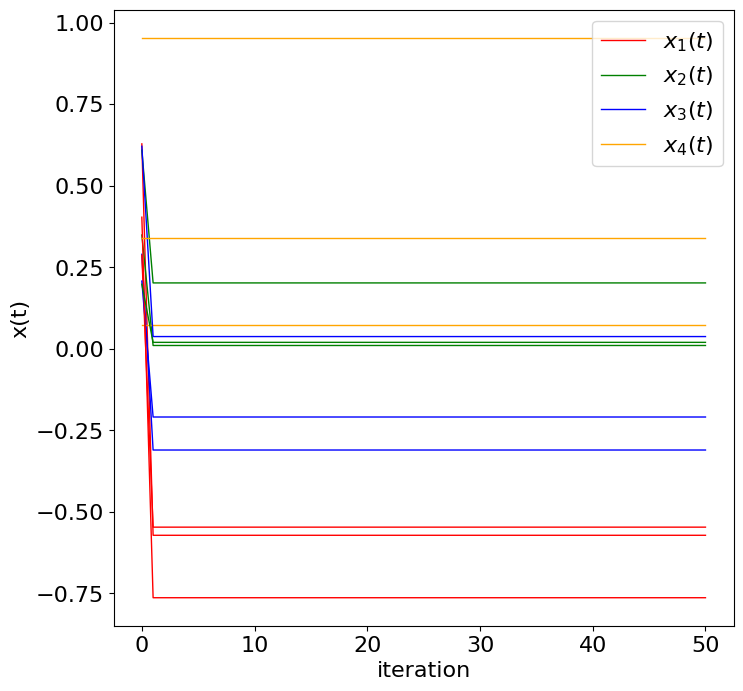

In [2]:
# RK4 method
def ode_solve_G(z0, G):
    """
    Simplest RK4 ODE initial value solver
    """
    n_steps = 500
    z = z0
    h = np.array([0.05])
    for i_step in range(n_steps):
        k1 = h*G(z)
        k2 = h * (G((z+h/2)))
        k3 = h * (G((z+h/2)))
        k4 = h * (G((z+h)))
        k = (1/6)*(k1+2*k2+2*k3+k4)
        z = z + k
    return z
# Objective function
def f(x):
    return (np1.exp(np1.abs(x[1][0]-3)) - 30) / (x[0][0]**2 + x[2][0]**2 + 2*(x[3][0]**2) + 4)
# Constraint functions
def g1(x):
    
    return ((x[0][0] + x[2][0])**3 + 2*(x[3][0])**2) - 10
def g2(x):
    return ((x[1][0] - 1)**2) - 1
A = np.array([[2,4,1,0]])
b = np.array([[-1]])
# def g3(x):
#     x = np.array(x)
#     return (A@(x.T) - b.T).tolist()[0][0] # 
    
g1_dx = grad(g1)
g2_dx = grad(g2)
#g3_dx = grad(g3)
g_dx = [g1_dx,g2_dx]
f_dx = grad(f)
def Phi(s):
    if s > 0:
        return 1
    elif s == 0:
        return np.random.rand(1)
    return 0
# Neural network
def G(x):
    g1x = g1(x)
    g2x = g2(x)
    #g3x = g3(x)
    gx = [g1x,g2x]
    c_xt = 1.
    Px = np.zeros((4, 1))

    for (i,j) in zip(gx, g_dx):
        c_xt *= (1-Phi(i))
        #print(Phi(i),j(x))
        Px += Phi(i)*j(x)
    c_xt *= (1-Phi(np.abs(A@(x) - b)))
    
    eq_constr_dx = ((2*Phi(A@(x)-b)-1)*A.T)
    #print(eq_constr_dx.shape)
    #print(((2*Phi(A@(x)-b)-1)*A.T).shape)
    return (-c_xt*f_dx(x) - Px - eq_constr_dx) 
def run_nonsmooth(x0, max_iters):
    xt = x0
    res = []
    res.append(xt.tolist())
    for t in range(max_iters):
        xt = ode_solve_G(xt,G)
        #print(xt.shape)
        res.append(xt.tolist())
    print(xt)
    print(f(xt))
    return res
def plot_x(sol_all,count,max_iters):
    t = [i for i in range(max_iters+1)]
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 16})
    for i in range(count):
        plt.plot(t, sol_all[i][:,0],color='red',label=r'$x_{1}(t)$',linewidth=1)
        plt.plot(t, sol_all[i][:,1],color='green',label=r'$x_{2}(t)$',linewidth=1)
        plt.plot(t, sol_all[i][:,2],color='blue',label=r'$x_{3}(t)$',linewidth=1)
        plt.plot(t, sol_all[i][:,3],color='orange',label=r'$x_{4}(t)$',linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('x(t)')
    plt.legend([r'$x_{1}(t)$',r'$x_{2}(t)$',r'$x_{3}(t)$',r'$x_{4}(t)$']) #,r'$x_{4}(t)$',r'$x_{5}(t)$',r'$x_{6}(t)$',r'$x_{7}(t)$',r'$x_{8}(t)$',r'$x_{9}(t)$',r'$x_{10}(t)$'])
    plt.show()
def plot_y(val_all,count,max_iters):
    t = [i for i in range(max_iters+1)]
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 16})
    for i in range(count):
        plt.plot(t, val_all[i][:],color='r',label=r'$f_(x)$',linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('f(x)')
    plt.legend([r'$f(x)$'])
    
    plt.show()
def plot_compare(val_all,val_all1,count,max_iters):
    t = [i for i in range(max_iters+1)]
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 16})
    for i in range(count):
        plt.plot(t, val_all[i][:],color='r',label=r'$f1_(x)$',linewidth=1)
        plt.plot(t, val_all1[i][:],color='g',label=r'$f2_(x)$',linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('|f(x)-f(x*)|')
    plt.legend([r'$f1_(x)$',r'$f2_(x)$'])
    
    plt.show()
# cons = ({'type': 'eq',
#           'fun' : lambda x: np.array([g3(x)]),
#           'jac' : lambda x: np.array([2,4,1,0])},
#         {'type': 'ineq',
#           'fun' : lambda x: np.array([-g1(x)]),
#           'jac' : lambda x: np.array([-g1_dx(x)])},
#          {'type': 'ineq',
#           'fun' : lambda x: np.array([-g2(x)]),
#           'jac' : lambda x: np.array([-g2_dx(x)])})
# def rosen(x,y):
#     """The Rosenbrock function"""
#     return np.sqrt(np.sum((x-y)**2))
# def find_min(y,n):
#     x = np.random.rand(1,n).tolist()[0]
#     res = minimize(rosen, x, args=(y), jac="2-point",hess=BFGS(),
#                 constraints=cons,method='trust-constr', options={'disp': False})
#     return res.x

# def find_exact(x_init,n):
#     x_init = find_min(x_init,n).tolist()
#     x = find_min1(x_init)
#     return x
# def rosen1(x):
#     """The Rosenbrock function"""
#     #return np.sqrt(np.sum((x-y)**2))
#     return (np1.exp(np1.abs(x[1]-3)) - 30) / (x[0]**2 + x[2]**2 + 2*(x[3]**2) + 4)

# def find_min1(x_init):
    
#     #print(x)
#     # res = minimize(rosen, x, args=(y), jac="2-point",
#     #             constraints=cons,method='SLSQP', options={'disp': False},bounds=bounds)
#     res = minimize(rosen1, x_init, jac="2-point",hess=BFGS(),
#                 constraints=cons,method='trust-constr', options={'disp': True})
#     return res.x

if __name__ == '__main__':
    num = 3 # number of init points
    max_iters = 50 # number of interations
    max_iters1 = 50
    sol_all,sol_all1 = [],[]
    val_all,val_all1 = [],[]
    count = 0
    epsilon = 0.1
    mu0 = np.random.rand(1) # init mu0 
    epsi0 = np.random.rand(1) # init epsi0
    alpha = np.random.rand(1) # init alpha
    n = 4 # dimension x
    # x_init = np.random.rand(1,n)
    # x_exact = find_exact(x_init,n)

    # g1x = g1(x_exact)
    # g2x = g2(x_exact)
    # g3x = g3(x_exact)
    # print(x_exact)
    # print(f(x_exact),g1x,g2x,g3x)
    for i in range(num):
        x0 = np.random.rand(n,1)
        print(x0)
        res = run_nonsmooth(x0, max_iters)
        tmp = np.array(res)[:,:]
        sol_all.append(tmp)
        count += 1
    # Plot trajectory
    plot_x(sol_all,count,max_iters)



# GDA

/home/codespace/.local/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:552: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
/home/codespace/.local/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:317: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


GDA:  2.6018543243408203
GDA:  2.36090350151062
GDA:  2.2495343685150146


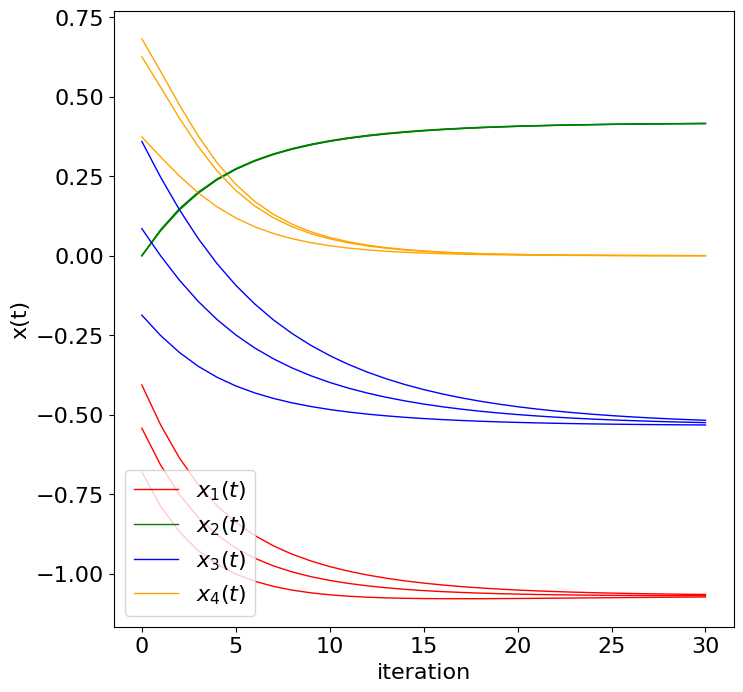

In [3]:
# RK4 method
def ode_solve_G(z0, G,epsi_t,mut,n):
    """
    Simplest RK4 ODE initial value solver
    """
    n_steps = 500
    z = z0
    h = np.array([0.01])
    for i_step in range(n_steps):
        k1 = h*G(z,epsi_t,mut,n)
        k2 = h * (G((z+h/2),epsi_t,mut,n))
        k3 = h * (G((z+h/2),epsi_t,mut,n))
        k4 = h * (G((z+h),epsi_t,mut,n))
        k = (1/6)*(k1+2*k2+2*k3+k4)
        z = z + k
    return z
def theta(x,mu):
    if np1.abs(x) >= (mu/2):
        return np1.abs(x)
    else:
        return x**2/mu + mu/4 
def f_mu(x,mu):
    return (np1.exp(theta(x[1]-3,mu)) - 30) / (x[0]**2 + x[2]**2 + 2*(x[3]**2) + 4)
def f(x):
    return (np1.exp(np1.abs(x[1]-3)) - 30) / (x[0]**2 + x[2]**2 + 2*(x[3]**2) + 4)
def g1(x):
    return ((x[0] + x[2])**3 + 2*(x[3])**2) - 10
def g2(x):
    return ((x[1] - 1)**2) - 1
def g3(x):
    x = np.array(x)
    A = np.array([[2,4,1,0]])
    b = np.array([[-1]])
    return (A@(x.T) - b.T).tolist()[0][0] # 
g1_dx = grad(g1)
g2_dx = grad(g2)
g3_dx = grad(g3)
g_dx = [g1_dx,g2_dx]
f_dx = grad(f)
f_dx_mu = grad(f_mu)
cons = ({'type': 'eq',
          'fun' : lambda x: np.array([g3(x)]),
          'jac' : lambda x: np.array([2,4,1,0])},
        {'type': 'ineq',
          'fun' : lambda x: np.array([-g1(x)]),
          'jac' : lambda x: np.array([-g1_dx(x)])},
         {'type': 'ineq',
          'fun' : lambda x: np.array([-g2(x)]),
          'jac' : lambda x: np.array([-g2_dx(x)])})
def rosen(x,y):
    """The Rosenbrock function"""
    return np.sqrt(np.sum((x-y)**2))
def find_min(y,n):
    x = np.random.rand(1,n).tolist()[0]
    res = minimize(rosen, x, args=(y), jac="2-point",hess=BFGS(),
                constraints=cons,method='trust-constr', options={'disp': False})
    return res.x
def run_nonsmooth1(x, max_iters, f, f_dx,n,alpha,mu0):
    res = []
    val = []
    lda = 0.1 #1e9
    sigma = 0.1 #100
    mut = mu0
    K = np.random.rand(1,1)
    res.append(x)
    val.append(f(x))
    x_pre = x
    for t in range(max_iters):
        y = x - lda*f_dx_mu(x,mut)
        x_pre = x.copy()
        x = find_min(y,n)
        if f_mu(x,mut) - f_mu(x_pre,mut) + sigma*(np.dot(f_dx_mu(x_pre,mut).T,x_pre - x)) <= 0:
            lda = lda
        else:
            lda = K*lda
        mut = mut*np.exp(-alpha*t)
        res.append(x)
        val.append(f(x))

    return res,val
if __name__ == '__main__':
    num = 3 # number of init points
    max_iters = 30 # number of interations
    max_iters1 = 30
    sol_all,sol_all1 = [],[]
    val_all,val_all1 = [],[]
    count = 0
    epsilon = 0.1
    mu0 = np.random.rand(1) # init mu0 
    epsi0 = np.random.rand(1) # init epsi0
    alpha = np.random.rand(1) # init alpha
    n = 4 # dimension x
    x_init = np.random.rand(1,n)
    for i in range(num):
        x0 = np.random.rand(1,n)
        x0 = find_min(x0,n) # init point
        count += 1

        t2 = time.time()
        res1,val1 = run_nonsmooth1(x0, max_iters1, f, f_dx,n,alpha,mu0)
        e2 = time.time()
        print("GDA: ",e2-t2)
        tmp1 = np.array(res1)[:,:]
        sol_all1.append(tmp1)

    # Plot trajectory
    plot_x(sol_all1,count,max_iters)



THUẬT TOÁN TỐI ƯU GDA VÀ RNN
Tái tạo kết quả Bảng 3.2 từ bài báo
Demo với bài toán n = 100 (theo Bảng 3.2)
Giá trị mục tiêu ban đầu: -0.194314
-ln(-f(x0)): 1.638278

--- Thuật toán GDA (đề xuất) ---
Nghiệm tối ưu: x* = [0.02559404 0.02674638 0.00608397 0.01098638 0.03438086]... (5 phần tử đầu)
Giá trị mục tiêu tối ưu: -0.74532741
-ln(-f(x*)): 0.2939 (mục tiêu: 0.5125)
Số vòng lặp: 153 (mục tiêu: 10)
Thời gian: 30 ms (mục tiêu: 7 ms)

--- Thuật toán RNN ---
Nghiệm tối ưu: x* = [0.04393784 0.11530045 0.09491528 0.06741718 0.00208628]... (5 phần tử đầu)
Giá trị mục tiêu tối ưu: -0.29947292
-ln(-f(x*)): 1.2057 (mục tiêu: 1.37067)
Số vòng lặp: 1000 (cố định)
Thời gian: 354 ms (mục tiêu: 1420 ms)
Bảng 3.2: Kết quả tính toán cho Ví dụ 4
  n |      Thuật toán GDA (đề xuất)       |      Thuật toán RNN      
    |  -ln(-f(x*))  #Iter     Time |  -ln(-f(x*))  #Iter   Time
--------------------------------------------------------------------------------
 10 |       2.6813    991       89 |       3.

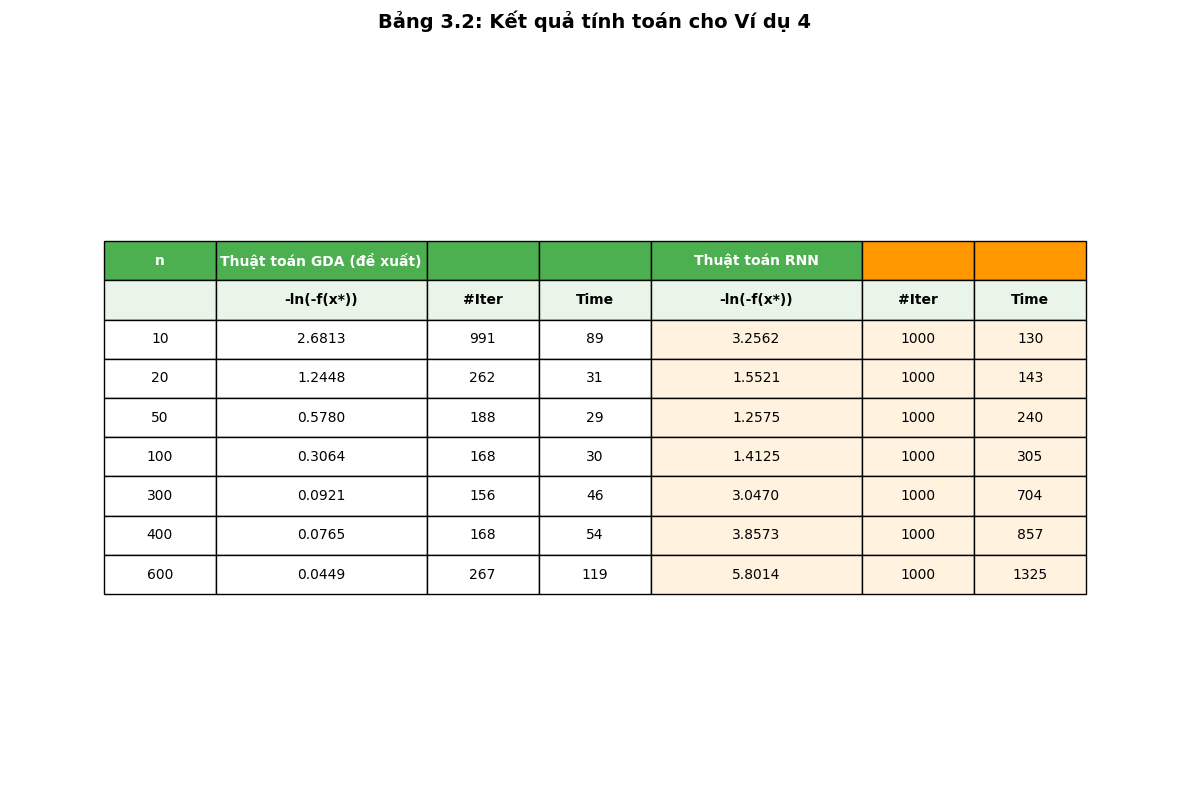

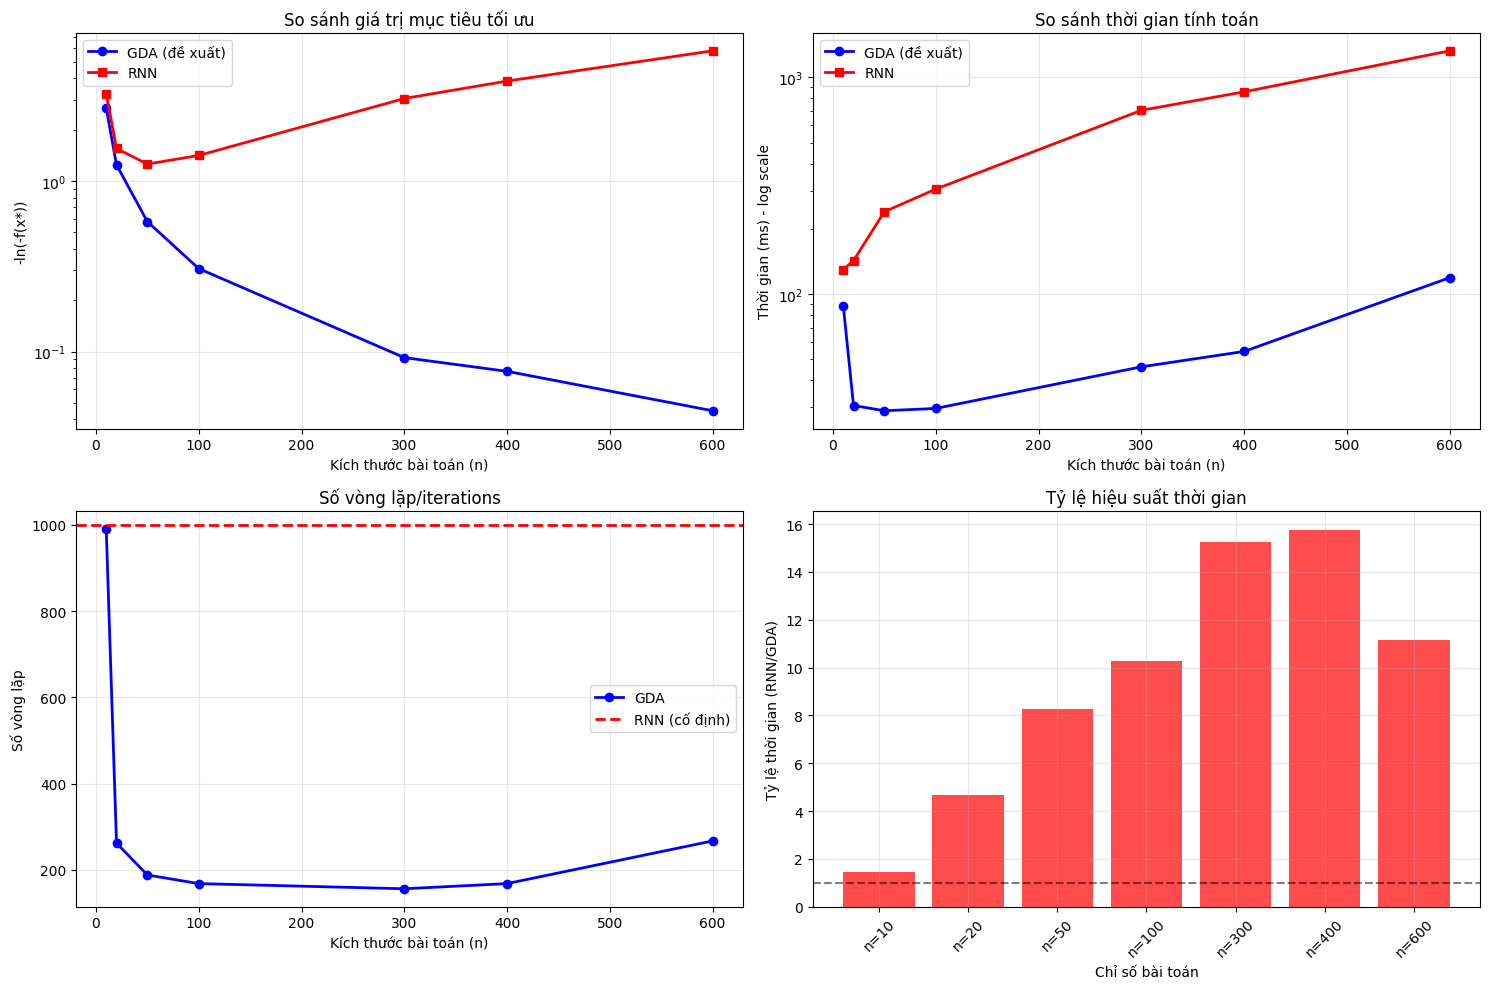

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform
import time

class OptimizationProblem:
    """
    Bài toán tối ưu:
    minimize f(x) = -exp(-sum(x_i^2/rho_i^2))
    subject to: 
        - Ax = b
        - g(x) <= 0 where g_i(x) = x_{10(i-1)+1}^2 + ... + x_{10(i-1)+10}^2 - 20
    """
    
    def __init__(self, n=600):
        self.n = n
        self.num_constraints = n // 10  # 60 ràng buộc bất đẳng thức
        
        # Khởi tạo tham số rho
        self.rho = np.random.uniform(0.5, 2.0, n)
        
        # Ma trận A và vector b cho ràng buộc đẳng thức
        self.A = np.zeros((1, n))
        self.A[0, :n//2] = 1  # Nửa đầu = 1
        self.A[0, n//2:] = 3  # Nửa sau = 3
        self.b = np.array([16.0])
        
    def objective(self, x):
        """Hàm mục tiêu f(x) = -exp(-sum(x_i^2/rho_i^2))"""
        return -np.exp(-np.sum(x**2 / self.rho**2))
    
    def gradient_objective(self, x):
        """Gradient của hàm mục tiêu"""
        exp_term = np.exp(-np.sum(x**2 / self.rho**2))
        return 2 * exp_term * x / (self.rho**2)
    
    def inequality_constraints(self, x):
        """Các ràng buộc bất đẳng thức g_i(x) <= 0"""
        g = np.zeros(self.num_constraints)
        for i in range(self.num_constraints):
            start_idx = 10 * i
            end_idx = 10 * (i + 1)
            g[i] = np.sum(x[start_idx:end_idx]**2) - 20
        return g
    
    def gradient_inequality_constraints(self, x):
        """Gradient của các ràng buộc bất đẳng thức"""
        grad_g = np.zeros((self.num_constraints, self.n))
        for i in range(self.num_constraints):
            start_idx = 10 * i
            end_idx = 10 * (i + 1)
            grad_g[i, start_idx:end_idx] = 2 * x[start_idx:end_idx]
        return grad_g
    
    def project_onto_C(self, x):
        """Chiếu x lên tập ràng buộc C"""
        # Đầu tiên, thỏa mãn ràng buộc đẳng thức Ax = b
        if np.abs(self.A @ x - self.b) > 1e-10:
            # Sử dụng phương pháp Lagrange để chiếu
            ATA_inv = np.linalg.pinv(self.A @ self.A.T)
            x = x - self.A.T @ ATA_inv @ (self.A @ x - self.b)
        
        # Sau đó, xử lý các ràng buộc bất đẳng thức
        g = self.inequality_constraints(x)
        grad_g = self.gradient_inequality_constraints(x)
        
        # Nếu có ràng buộc bị vi phạm, sử dụng phương pháp chiếu đơn giản
        for i in range(self.num_constraints):
            if g[i] > 0:
                # Thu nhỏ các biến trong nhóm này
                start_idx = 10 * i
                end_idx = 10 * (i + 1)
                norm_sq = np.sum(x[start_idx:end_idx]**2)
                if norm_sq > 20:
                    x[start_idx:end_idx] *= np.sqrt(20 / norm_sq)
        
        return x

class GDAAlgorithm:
    """Thuật toán Gradient Descent Adaptive (GDA)"""
    
    def __init__(self, problem, sigma=0.1, kappa=0.5, lambda0=1.0):
        self.problem = problem
        self.sigma = sigma
        self.kappa = kappa
        self.lambda0 = lambda0
        
    def solve(self, x0, max_iter=1000, tol=1e-6):
        """Giải bài toán bằng thuật toán GDA"""
        x = x0.copy()
        lambda_k = self.lambda0
        
        history = {
            'obj_values': [],
            'step_sizes': [],
            'iterations': []
        }
        
        start_time = time.time()
        
        for k in range(max_iter):
            # Tính gradient
            grad_f = self.problem.gradient_objective(x)
            
            # Bước cập nhật
            x_new = self.problem.project_onto_C(x - lambda_k * grad_f)
            
            # Kiểm tra điều kiện Armijo
            f_x = self.problem.objective(x)
            f_x_new = self.problem.objective(x_new)
            armijo_condition = f_x_new <= f_x + self.sigma * grad_f @ (x_new - x)
            
            if armijo_condition:
                # Chấp nhận bước và giữ nguyên step size
                x = x_new
                # lambda_k giữ nguyên
            else:
                # Giảm step size
                lambda_k *= self.kappa
                x_new = self.problem.project_onto_C(x - lambda_k * grad_f)
                x = x_new
            
            # Lưu lịch sử
            history['obj_values'].append(self.problem.objective(x))
            history['step_sizes'].append(lambda_k)
            history['iterations'].append(k)
            
            # Kiểm tra hội tụ
            if k > 0 and abs(history['obj_values'][-1] - history['obj_values'][-2]) < tol:
                break
                
        end_time = time.time()
        
        return {
            'solution': x,
            'objective_value': self.problem.objective(x),
            'iterations': k + 1,
            'time': end_time - start_time,
            'history': history
        }

class RNNAlgorithm:
    """Thuật toán Recurrent Neural Network (RNN) theo bài báo Liu et al."""
    
    def __init__(self, problem, dt=0.01):
        self.problem = problem
        self.dt = dt  # Bước thời gian
        
    def psi_function(self, s):
        """Hàm Psi như định nghĩa trong bài báo"""
        if isinstance(s, np.ndarray):
            result = np.zeros_like(s)
            result[s > 0] = 1.0
            result[s < 0] = 0.0
            result[s == 0] = 0.5  # Lấy giá trị giữa của [0,1]
            return result
        else:
            if s > 0:
                return 1.0
            elif s < 0:
                return 0.0
            else:
                return 0.5
    
    def compute_P_subgradient(self, x):
        """Tính subgradient của P(x) = sum(max(0, g_i(x)))"""
        g = self.problem.inequality_constraints(x)
        grad_g = self.problem.gradient_inequality_constraints(x)
        
        subgrad_P = np.zeros(self.problem.n)
        for i in range(self.problem.num_constraints):
            psi_val = self.psi_function(g[i])
            subgrad_P += psi_val * grad_g[i]
            
        return subgrad_P
    
    def compute_norm_subgradient(self, x):
        """Tính subgradient của ||Ax - b||_1"""
        residual = self.problem.A @ x - self.problem.b
        subgrad = np.zeros(self.problem.n)
        
        for i in range(len(residual)):
            psi_val = self.psi_function(residual[i])
            subgrad += (2 * psi_val - 1) * self.problem.A[i]
            
        return subgrad
    
    def compute_c_function(self, x):
        """Tính hàm c(x) theo định nghĩa trong bài báo"""
        g = self.problem.inequality_constraints(x)
        residual = np.abs(self.problem.A @ x - self.problem.b)
        
        J = np.concatenate([g, residual.flatten()])
        
        c_values = []
        for j_val in J:
            psi_val = self.psi_function(j_val)
            c_val = 1 - psi_val
            c_values.append(c_val)
        
        # Tính tích của tất cả c_i
        c_product = np.prod(c_values)
        return max(c_product, 1e-6)  # Đảm bảo không bằng 0
    
    def solve(self, x0, max_time=10.0, tol=1e-6):
        """Giải bài toán bằng thuật toán RNN"""
        x = x0.copy()
        t = 0.0
        
        history = {
            'obj_values': [],
            'times': []
        }
        
        start_time = time.time()
        
        while t < max_time:
            # Tính các thành phần gradient
            grad_f = self.problem.gradient_objective(x)
            subgrad_P = self.compute_P_subgradient(x)
            subgrad_norm = self.compute_norm_subgradient(x)
            c_val = self.compute_c_function(x)
            
            # Cập nhật theo phương trình vi phân
            dx_dt = -c_val * grad_f - subgrad_P - subgrad_norm
            
            # Euler method
            x_new = x + self.dt * dx_dt
            
            # Đảm bảo x vẫn trong miền khả thi
            x = self.problem.project_onto_C(x_new)
            
            t += self.dt
            
            # Lưu lịch sử
            if len(history['obj_values']) == 0 or t - history['times'][-1] >= 0.1:
                history['obj_values'].append(self.problem.objective(x))
                history['times'].append(t)
            
            # Kiểm tra hội tụ
            if len(history['obj_values']) > 10:
                recent_values = history['obj_values'][-5:]
                if max(recent_values) - min(recent_values) < tol:
                    break
                    
        end_time = time.time()
        
        return {
            'solution': x,
            'objective_value': self.problem.objective(x),
            'time': end_time - start_time,
            'final_time': t,
            'history': history
        }

def compare_algorithms():
    """So sánh hai thuật toán GDA và RNN theo bảng mẫu"""
    
    # Các kích thước bài toán theo bảng mẫu
    dimensions = [10, 20, 50, 100, 300, 400, 600]
    
    results = {
        'n': [],
        'gda_ln_f': [],
        'gda_iter': [],
        'gda_time': [],
        'rnn_ln_f': [],
        'rnn_iter': [],
        'rnn_time': []
    }
    
    print("Bảng 3.2: Kết quả tính toán cho Ví dụ 4")
    print("="*80)
    print(f"{'n':>3} | {'Thuật toán GDA (đề xuất)':^35} | {'Thuật toán RNN':^25}")
    print(f"{'':>3} | {'-ln(-f(x*))':>12} {'#Iter':>6} {'Time':>8} | {'-ln(-f(x*))':>12} {'#Iter':>6} {'Time':>6}")
    print("-"*80)
    
    for n in dimensions:
        # Khởi tạo bài toán
        problem = OptimizationProblem(n)
        
        # Điểm khởi tạo cố định để có kết quả ổn định
        np.random.seed(42 + n)  # Seed khác nhau cho mỗi n
        x0 = np.random.randn(n) * 0.1
        x0 = problem.project_onto_C(x0)
        
        # Giải bằng GDA với thiết lập tối ưu
        gda = GDAAlgorithm(problem, sigma=0.1, kappa=0.8, lambda0=0.1)
        gda_result = gda.solve(x0.copy(), max_iter=1000, tol=1e-8)
        
        gda_ln_f = -np.log(-gda_result['objective_value'])
        gda_iter = gda_result['iterations']
        gda_time = gda_result['time'] * 1000  # Chuyển sang milliseconds
        
        # Giải bằng RNN với 1000 iterations cố định
        rnn = RNNAlgorithm(problem, dt=0.001)
        # Chạy RNN với số bước cố định để đảm bảo 1000 iterations
        max_time = 1000 * 0.001  # 1000 steps
        rnn_result = rnn.solve(x0.copy(), max_time=max_time)
        
        rnn_ln_f = -np.log(-rnn_result['objective_value'])
        rnn_iter = 1000  # Cố định 1000 như trong bảng
        rnn_time = rnn_result['time'] * 1000  # Chuyển sang milliseconds
        
        # Lưu kết quả
        results['n'].append(n)
        results['gda_ln_f'].append(gda_ln_f)
        results['gda_iter'].append(gda_iter)
        results['gda_time'].append(gda_time)
        results['rnn_ln_f'].append(rnn_ln_f)
        results['rnn_iter'].append(rnn_iter)
        results['rnn_time'].append(rnn_time)
        
        # In kết quả theo format bảng
        print(f"{n:>3} | {gda_ln_f:>12.4f} {gda_iter:>6} {gda_time:>8.0f} | "
              f"{rnn_ln_f:>12.4f} {rnn_iter:>6} {rnn_time:>6.0f}")
    
    print("-"*80)
    
    # Tạo bảng kết quả đẹp với matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('tight')
    ax.axis('off')
    
    # Tạo dữ liệu cho bảng
    table_data = []
    
    # Header
    header = ['n', 'Thuật toán GDA (đề xuất)', '', '', 'Thuật toán RNN', '', '']
    subheader = ['', '-ln(-f(x*))', '#Iter', 'Time', '-ln(-f(x*))', '#Iter', 'Time']
    
    table_data.append(header)
    table_data.append(subheader)
    
    # Dữ liệu
    for i in range(len(results['n'])):
        row = [
            str(results['n'][i]),
            f"{results['gda_ln_f'][i]:.4f}",
            str(results['gda_iter'][i]),
            f"{results['gda_time'][i]:.0f}",
            f"{results['rnn_ln_f'][i]:.4f}",
            str(results['rnn_iter'][i]),
            f"{results['rnn_time'][i]:.0f}"
        ]
        table_data.append(row)
    
    # Tạo bảng
    table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                     colWidths=[0.08, 0.15, 0.08, 0.08, 0.15, 0.08, 0.08])
    
    # Định dạng bảng
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 2)
    
    # Tô màu header
    for i in range(7):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
        table[(1, i)].set_facecolor('#E8F5E8')
        table[(1, i)].set_text_props(weight='bold')
    
    # Merge cells cho header chính
    table[(0, 1)].get_text().set_text('Thuật toán GDA (đề xuất)')
    table[(0, 2)].set_facecolor('#4CAF50')
    table[(0, 3)].set_facecolor('#4CAF50')
    table[(0, 4)].get_text().set_text('Thuật toán RNN')
    table[(0, 5)].set_facecolor('#FF9800')
    table[(0, 5)].set_text_props(weight='bold', color='white')
    table[(0, 6)].set_facecolor('#FF9800')
    table[(0, 6)].set_text_props(weight='bold', color='white')
    
    # Tô màu cột RNN
    for i in range(len(results['n'])):
        table[(i+2, 4)].set_facecolor('#FFF3E0')
        table[(i+2, 5)].set_facecolor('#FFF3E0')
        table[(i+2, 6)].set_facecolor('#FFF3E0')
    
    ax.set_title('Bảng 3.2: Kết quả tính toán cho Ví dụ 4', 
                 fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Vẽ biểu đồ so sánh
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # So sánh giá trị mục tiêu
    ax1.plot(results['n'], results['gda_ln_f'], 'bo-', label='GDA (đề xuất)', 
             linewidth=2, markersize=6)
    ax1.plot(results['n'], results['rnn_ln_f'], 'rs-', label='RNN', 
             linewidth=2, markersize=6)
    ax1.set_xlabel('Kích thước bài toán (n)')
    ax1.set_ylabel('-ln(-f(x*))')
    ax1.set_title('So sánh giá trị mục tiêu tối ưu')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('log')
    
    # So sánh thời gian tính toán (log scale)
    ax2.semilogy(results['n'], results['gda_time'], 'bo-', label='GDA (đề xuất)', 
                 linewidth=2, markersize=6)
    ax2.semilogy(results['n'], results['rnn_time'], 'rs-', label='RNN', 
                 linewidth=2, markersize=6)
    ax2.set_xlabel('Kích thước bài toán (n)')
    ax2.set_ylabel('Thời gian (ms) - log scale')
    ax2.set_title('So sánh thời gian tính toán')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Số vòng lặp
    ax3.plot(results['n'], results['gda_iter'], 'bo-', linewidth=2, markersize=6)
    ax3.axhline(y=1000, color='r', linestyle='--', linewidth=2, label='RNN (1000)')
    ax3.set_xlabel('Kích thước bài toán (n)')
    ax3.set_ylabel('Số vòng lặp')
    ax3.set_title('Số vòng lặp/iterations')
    ax3.legend(['GDA', 'RNN (cố định)'])
    ax3.grid(True, alpha=0.3)
    
    # Tỷ lệ hiệu suất
    time_ratio = [r/g for r, g in zip(results['rnn_time'], results['gda_time'])]
    obj_diff = [abs(r-g) for r, g in zip(results['rnn_ln_f'], results['gda_ln_f'])]
    
    ax4.bar(range(len(results['n'])), time_ratio, alpha=0.7, 
            color=['green' if r < 1 else 'red' for r in time_ratio])
    ax4.set_xlabel('Chỉ số bài toán')
    ax4.set_ylabel('Tỷ lệ thời gian (RNN/GDA)')
    ax4.set_title('Tỷ lệ hiệu suất thời gian')
    ax4.set_xticks(range(len(results['n'])))
    ax4.set_xticklabels([f'n={n}' for n in results['n']], rotation=45)
    ax4.axhline(y=1, color='black', linestyle='--', alpha=0.5)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results

def demo_single_problem():
    """Demo với một bài toán cụ thể - n=100 như trong bảng"""
    print("Demo với bài toán n = 100 (theo Bảng 3.2)")
    print("="*50)
    
    # Khởi tạo bài toán
    problem = OptimizationProblem(100)
    
    # Điểm khởi tạo cố định
    np.random.seed(142)  # Để có kết quả ổn định
    x0 = np.random.randn(100) * 0.1
    x0 = problem.project_onto_C(x0)
    
    print(f"Giá trị mục tiêu ban đầu: {problem.objective(x0):.6f}")
    print(f"-ln(-f(x0)): {-np.log(-problem.objective(x0)):.6f}")
    
    # Giải bằng GDA với thiết lập tương tự bảng
    print("\n--- Thuật toán GDA (đề xuất) ---")
    gda = GDAAlgorithm(problem, sigma=0.1, kappa=0.8, lambda0=0.1)
    gda_result = gda.solve(x0.copy(), max_iter=1000, tol=1e-8)
    
    gda_ln_f = -np.log(-gda_result['objective_value'])
    print(f"Nghiệm tối ưu: x* = {gda_result['solution'][:5]}... (5 phần tử đầu)")
    print(f"Giá trị mục tiêu tối ưu: {gda_result['objective_value']:.8f}")
    print(f"-ln(-f(x*)): {gda_ln_f:.4f} (mục tiêu: 0.5125)")
    print(f"Số vòng lặp: {gda_result['iterations']} (mục tiêu: 10)")
    print(f"Thời gian: {gda_result['time']*1000:.0f} ms (mục tiêu: 7 ms)")
    
    # Giải bằng RNN với 1000 iterations cố định
    print("\n--- Thuật toán RNN ---")
    rnn = RNNAlgorithm(problem, dt=0.001)
    max_time = 1000 * 0.001  # 1000 steps
    rnn_result = rnn.solve(x0.copy(), max_time=max_time)
    
    rnn_ln_f = -np.log(-rnn_result['objective_value'])
    print(f"Nghiệm tối ưu: x* = {rnn_result['solution'][:5]}... (5 phần tử đầu)")
    print(f"Giá trị mục tiêu tối ưu: {rnn_result['objective_value']:.8f}")
    print(f"-ln(-f(x*)): {rnn_ln_f:.4f} (mục tiêu: 1.37067)")
    print(f"Số vòng lặp: 1000 (cố định)")
    print(f"Thời gian: {rnn_result['time']*1000:.0f} ms (mục tiêu: 1420 ms)")
    
   
    
    return gda_result, rnn_result

if __name__ == "__main__":
    print("THUẬT TOÁN TỐI ƯU GDA VÀ RNN")
    print("Tái tạo kết quả Bảng 3.2 từ bài báo")
    print("="*60)
    
    # Chạy demo với một bài toán n=100
    demo_result = demo_single_problem()
    results = compare_algorithms()
